In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
!pip3 install datapane
#conda install -c conda-forge "datapane>=0.16.4"

In [97]:
!pip install --upgrade datapane

In [108]:
!pip install pydantic==1.8.2

In [113]:
conda install -c conda-forge "datapane>=0.16.4"


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: datapane


In [4]:
import datapane as dp

dp.login(token="ac25a088054529c1d10748b8e78e749fbb7c747c")

Connected successfully to https://cloud.datapane.com as shrantuni.moon94@gmail.com


'shrantuni.moon94@gmail.com'

In [5]:
p=pd.read_csv("Walmart (1).csv")

E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

<Figure size 2160x2880 with 0 Axes>

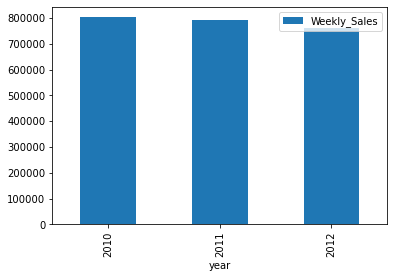

In [8]:
p['year']=pd.to_datetime(p['Date']).dt.year
q=p.loc[(p['Store']==45)]
q_grouped=q.groupby('year')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(30,40))
q_grouped.plot(kind='bar',x='year',y='Weekly_Sales')
plt.show()

In [11]:
import plotly.express as px 
import datapane as dp 

p['year']=pd.to_datetime(p['Date']).dt.year
q=p.loc[p['Store']==45]
q_grouped=q.groupby('year')['Weekly_Sales'].mean().reset_index()

fig = px.scatter( q_grouped,x="year", y="Weekly_Sales", size="Weekly_Sales", 
                 color="year", hover_name="Weekly_Sales", log_x=True, size_max=60) 

dp.upload_report([dp.Plot(fig),dp.DataTable(p)],name='my report' ) #Create a report
#report.publish(name='my_plot', open=True, visibility='PUBLIC') #Publish the report


E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16-04-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=

Uploading report and associated data - *please wait...*

Report successfully uploaded - view and share at <a href='https://cloud.datapane.com/reports/EkajXgA/my-report/' target='_blank'>here</a>.

Uploaded CloudReport - view at https://cloud.datapane.com/reports/EkajXgA/my-report/

In [10]:
p.size,p.shape

(57915, (6435, 9))

In [5]:
p.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [14]:
p.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
p['CPI']=p['CPI'].dropna()
p['Fuel_Price']=p['Fuel_Price'].dropna()
p['Weekly_Sales']=p['Weekly_Sales'].dropna()
p['Temperature']=p['Temperature'].dropna()
p['Unemployment']=p['Unemployment'].dropna()

In [11]:
for i in p.columns:
    if i not in ['Date','Store','Holiday_Flag']:
        z_scores=np.abs((p[i]-p[i].mean())/ p[i].std())
        threshold=2
        p=p[z_scores<threshold]
 
p

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


<AxesSubplot:>

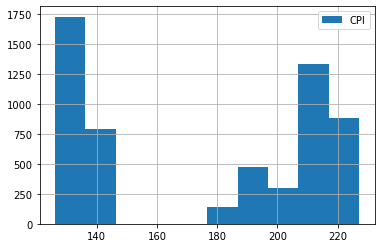

In [25]:
p['CPI'].hist(legend=True)

<AxesSubplot:>

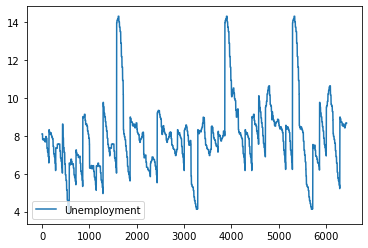

In [9]:
p['Unemployment'].plot(legend=True)

<AxesSubplot:>

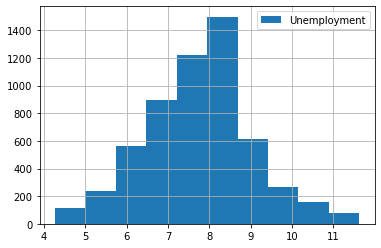

In [60]:
p['Unemployment'].hist(legend=True)

<AxesSubplot:>

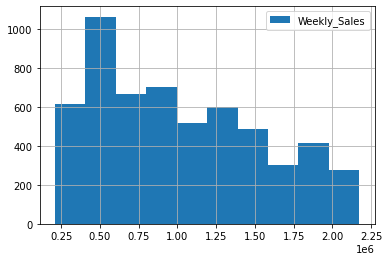

In [61]:
p['Weekly_Sales'].hist(legend=True)

In [26]:



# Create an empty dictionary to store the data of each store
store_data = {}
for store_name in p['Store'].unique():
   
    store_df = p[p['Store'] == store_name]
    
  
    store_data[store_name] = store_df

# Access data for a specific store
store_name = 1  # Replace with the desired store name or ID
store1_data = store_data.get(store_name)



In [27]:
# Create an empty dictionary to store the data of each store
store_data = {}
for store_name in p['Store'].unique():
   
    store_df = p[p['Store'] == store_name]
    
  
    store_data[store_name] = store_df

# Access data for a specific store
store_name = 1  # Replace with the desired store name or ID
store1_data = store_data.get(store_name)


<AxesSubplot:>

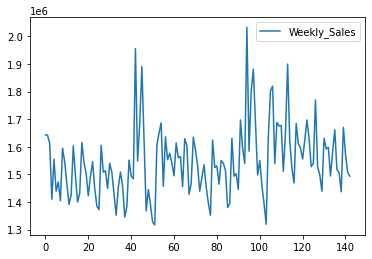

In [28]:
store1_data['Weekly_Sales'].plot(legend=True)

<AxesSubplot:xlabel='CPI'>

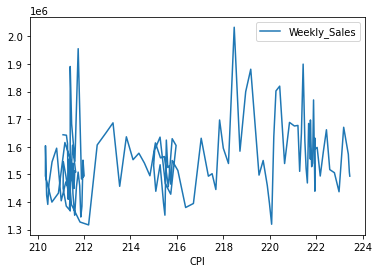

In [29]:
store1_data.plot(x='CPI',y='Weekly_Sales')

In [10]:
# Create an empty dictionary to store the data of each store
store_data = {}
for store_name in p['Store'].unique():
   
    store_df = p[p['Store'] == store_name]
    
  
    store_data[store_name] = store_df

# Access data for a specific store
store_name =5   # Replace with the desired store name or ID
store1_data = store_data.get(store_name)


<AxesSubplot:xlabel='CPI'>

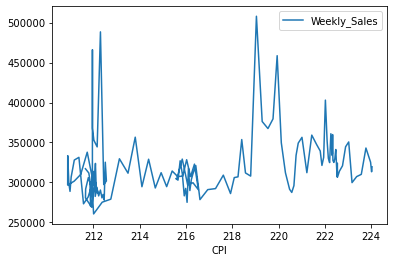

In [11]:
store1_data.plot(x='CPI',y='Weekly_Sales')

E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
E:\anaconda new\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

<Figure size 2160x2880 with 0 Axes>

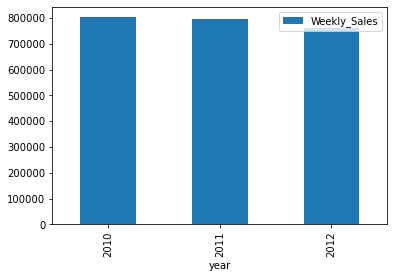

In [35]:
p['year']=pd.to_datetime(p['Date']).dt.year
q=p.loc[(p['Store']==45)]
q_grouped=q.groupby('year')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(30,40))
q_grouped.plot(kind='bar',x='year',y='Weekly_Sales')
plt.show()

<AxesSubplot:>

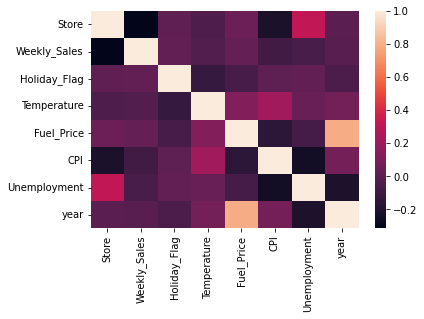

In [13]:
sns.heatmap(p.corr())

In [14]:
p.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
Store,1.000000,-0.315308,0.010021,-0.044748,0.045363,-0.218673,0.309461,-0.004646
Weekly_Sales,-0.315308,1.000000,0.014098,-0.037707,0.027082,-0.087679,-0.062957,-0.014015
Holiday_Flag,0.010021,0.014098,1.000000,-0.129829,-0.065735,0.006928,0.017619,-0.049427
Temperature,-0.044748,-0.037707,-0.129829,1.000000,0.119981,0.212745,0.038951,0.074129
Fuel_Price,0.045363,0.027082,-0.065735,0.119981,1.000000,-0.156465,-0.077149,0.788626
CPI,-0.218673,-0.087679,0.006928,0.212745,-0.156465,1.000000,-0.251490,0.080060
Unemployment,0.309461,-0.062957,0.017619,0.038951,-0.077149,-0.251490,1.000000,-0.216721
year,-0.004646,-0.014015,-0.049427,0.074129,0.788626,0.080060,-0.216721,1.000000


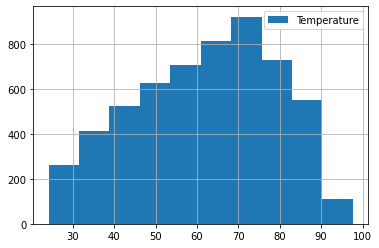

In [36]:
p['Temperature'].hist(legend=True)
i=p['Temperature'].median()
p['Temperature']=np.where(p['Temperature']>i,0,1)



In [80]:
p2=p[p['month']==2]
#p1=p.groupby('month')['Weekly_Sales'].mean()
#p1['Weekly_Sales'].hist(legend=True)
p2 #.hist(legend=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week,month


In [79]:
p

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week,month
0,1,05-02-2010,1643690.90,0,1,2.572,211.096358,8.106,2010,NaN,1
1,1,12-02-2010,1641957.44,1,1,2.548,211.242170,8.106,2010,NaN,1
2,1,19-02-2010,1611968.17,0,1,2.514,211.289143,8.106,2010,NaN,1
3,1,26-02-2010,1409727.59,0,1,2.561,211.319643,8.106,2010,NaN,1
4,1,05-03-2010,1554806.68,0,1,2.625,211.350143,8.106,2010,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,0,3.997,192.013558,8.684,2012,NaN,1
6431,45,05-10-2012,733455.07,0,0,3.985,192.170412,8.667,2012,NaN,1
6432,45,12-10-2012,734464.36,0,1,4.000,192.327265,8.667,2012,NaN,1
6433,45,19-10-2012,718125.53,0,1,3.969,192.330854,8.667,2012,NaN,1


In [43]:
p['month']=pd.to_datetime(p['Weekly_Sales']).dt.month
p

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week,month
0,1,05-02-2010,1643690.90,0,1,2.572,211.096358,8.106,2010,NaN,1
1,1,12-02-2010,1641957.44,1,1,2.548,211.242170,8.106,2010,NaN,1
2,1,19-02-2010,1611968.17,0,1,2.514,211.289143,8.106,2010,NaN,1
3,1,26-02-2010,1409727.59,0,1,2.561,211.319643,8.106,2010,NaN,1
4,1,05-03-2010,1554806.68,0,1,2.625,211.350143,8.106,2010,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,0,3.997,192.013558,8.684,2012,NaN,1
6431,45,05-10-2012,733455.07,0,0,3.985,192.170412,8.667,2012,NaN,1
6432,45,12-10-2012,734464.36,0,1,4.000,192.327265,8.667,2012,NaN,1
6433,45,19-10-2012,718125.53,0,1,3.969,192.330854,8.667,2012,NaN,1


In [45]:
X=p.loc[:,['month','Store','Unemployment','Fuel_Price','year','Holiday_Flag','Temperature']]
y=p.loc[:,['Weekly_Sales']]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
p['Holiday_Flag']=lb.fit_transform(p['Holiday_Flag'])
p['Temperature']=lb.fit_transform(p['Temperature'])

from xgboost import XGBRegressor
m1=XGBRegressor()
m1.fit(X_train,y_train)
y_pred=m1.predict(X_test)
from sklearn import metrics 
print(metrics.mean_squared_error(y_test,y_pred),'mse')
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'rmse')
print(metrics.mean_absolute_error(y_test,y_pred),'mae')
print(metrics.r2_score(y_test,y_pred),'r2-score')



8304315160.454553 mse
91128.01523381573 rmse
58133.92380122348 mae
0.9715119565957653 r2-score


In [ ]:
X=p.loc[:,['Store','Temperature','CPI','Unemployment','Holiday_Flag','Fuel_Price']]
y=p.loc[:,['Weekly_Sales']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeRegressor
M1=DecisionTreeRegressor(max_depth=10)
M1.fit(X_train,y_train)
pred=M1.predict(X_test)
from sklearn import metrics 
print(metrics.mean_squared_error(y_test,y_pred),'mse')
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'rmse')
print(metrics.mean_absolute_error(y_test,y_pred),'mae')
print(metrics.r2_score(y_test,y_pred),'r2-score')



# TIME SERIES

In [ ]:
from statsmodels.tsa.stattools import adfuller
def add_test(p):
    dftest=adfuller(p,autolag='AIC')
    print("1. ADF:",dftest[0])
    print("2. pvalue:",dftest[1])
    print("3. no. of lags:",dftest[2])
    print("4. no. of observation usedd for ADF Regression:",dftest[3])
    print("5. critical value:")
    for key,val in dftest[4].items():
        print("\t",key,":",val)
add_test(p['Weekly_Sales'])

In [25]:
from pmdarima import auto_arima
stepwise_fit=auto_arima(p['Weekly_Sales'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=173103.554, Time=3.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=174457.419, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=173626.224, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=173359.721, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=174455.423, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=173301.748, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=173266.524, Time=2.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=172741.309, Time=3.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=172905.020, Time=2.93 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=172730.428, Time=8.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=172847.176, Time=2.99 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=172588.751, Time=14.62 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=172597.113, Time=3.62 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=172572.018, Time=7.64 sec
 ARI

In [ ]:
train=p.iloc[:-30,[1,2]]
test=p.iloc[-30:,[1,2]]


In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
M1=SARIMAX(p['Weekly_Sales'],order=(4,1,5))
model=M1.fit()
print(model.summary())

In [ ]:
#checking is the model is good
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels').rename('ARIMA PREDICTION')
pred.plot(legend=True)
test['Weekly_Sales'].plot(legend=True)

In [ ]:
from sklearn import metrics
X=test['Weekly_Sales'].mean()
rmse=np.sqrt(metrics.mean_squared_error(test['Weekly_Sales'],pred))
mse=metrics.mean_squared_error(test['Weekly_Sales'],pred)
mae=metrics.mean_absolute_error(test['Weekly_Sales'],pred)
print('\t',X,':mean',rmse,':rmse',mse,':mse',mae,':mae')

In [ ]:


start_date = pd.to_datetime('26-10-2012', format='%d-%m-%Y')
future = pd.date_range(start=start_date, periods=50, freq='D')

pred=model.predict(start=len(p),end=len(p)+49,type='levels').rename('ARIMA PREDICTION')
pred.index=future
print(pred)